# MovieLens-32M 数据分析报告（tags）


## 1. 准备阶段


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline
sns.set_style("whitegrid")

# 中文字体设置 (针对 Mac)
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False


In [2]:
# 定义数据路径
DATA_DIR = "../data/ml-32m/"

# 加载所有核心数据
movies = pd.read_csv(DATA_DIR + "movies.csv")
ratings = pd.read_csv(DATA_DIR + "ratings.csv")
tags = pd.read_csv(DATA_DIR + "tags.csv")


## 2. 探索性数据分析 (EDA)


### 2.1 电影基础信息 (movies.csv)


In [3]:
print(f"共有电影数量: {len(movies)}")
movies.head()


共有电影数量: 87585


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


/var/folders/_5/ql8mk2rn2sg4gcml8stj86tw0000gn/T/ipykernel_54045/1224943945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=genres_list, order=genres_list.value_counts().index, palette="viridis")


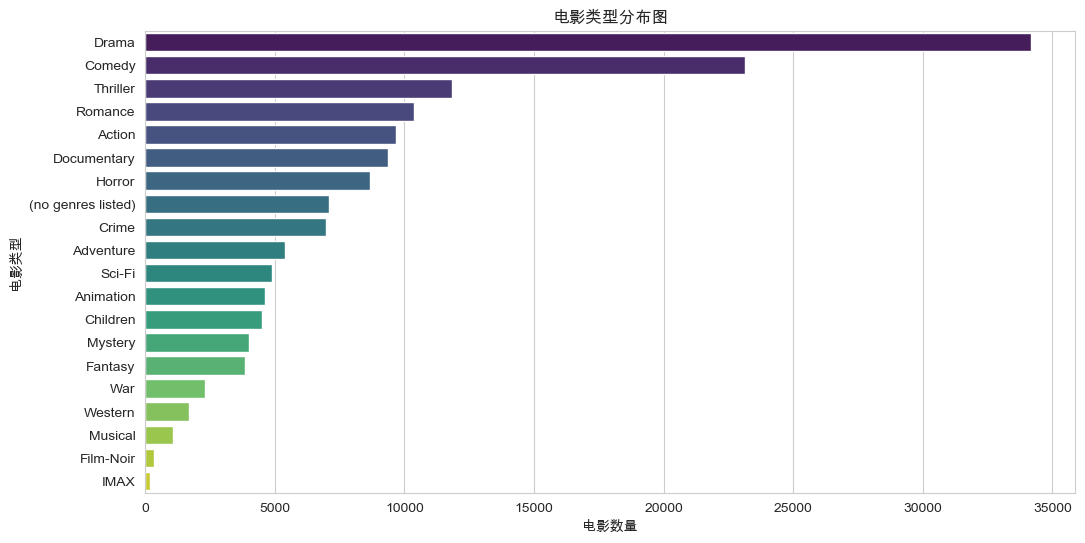

In [4]:
# 电影类型分布统计
genres_list = movies["genres"].str.split("|").explode()
plt.figure(figsize=(12, 6))
sns.countplot(y=genres_list, order=genres_list.value_counts().index, palette="viridis")
plt.title("电影类型分布图")
plt.xlabel("电影数量")
plt.ylabel("电影类型")
plt.show()


### 2.2 用户评分行为分析 (ratings.csv)


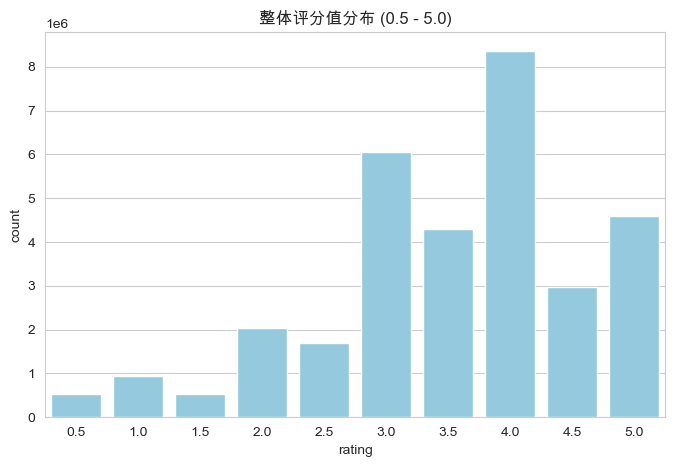

In [5]:
# 评分整体分布
plt.figure(figsize=(8, 5))
sns.countplot(x="rating", data=ratings, color="skyblue")
plt.title("整体评分值分布 (0.5 - 5.0)")
plt.show()


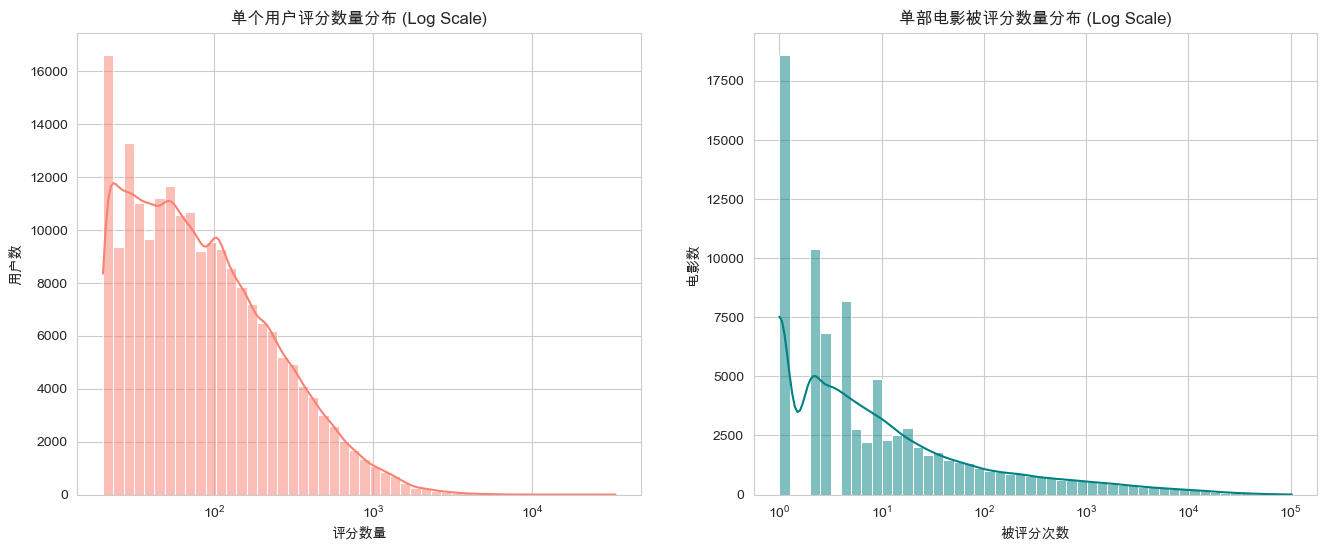

In [6]:
# 活跃度分布分析
user_counts = ratings.groupby("userId").size()
movie_counts = ratings.groupby("movieId").size()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 用户评分数量分布 (对数刻度)
sns.histplot(user_counts, bins=50, kde=True, ax=ax1, log_scale=True, color="salmon")
ax1.set_title("单个用户评分数量分布 (Log Scale)")
ax1.set_xlabel("评分数量")
ax1.set_ylabel("用户数")

# 电影受关注度分布
sns.histplot(movie_counts, bins=50, kde=True, ax=ax2, log_scale=True, color="teal")
ax2.set_title("单部电影被评分数量分布 (Log Scale)")
ax2.set_xlabel("被评分次数")
ax2.set_ylabel("电影数")

plt.show()


### 2.3 标签内容分析 (tags.csv)


共有标签记录: 2000072


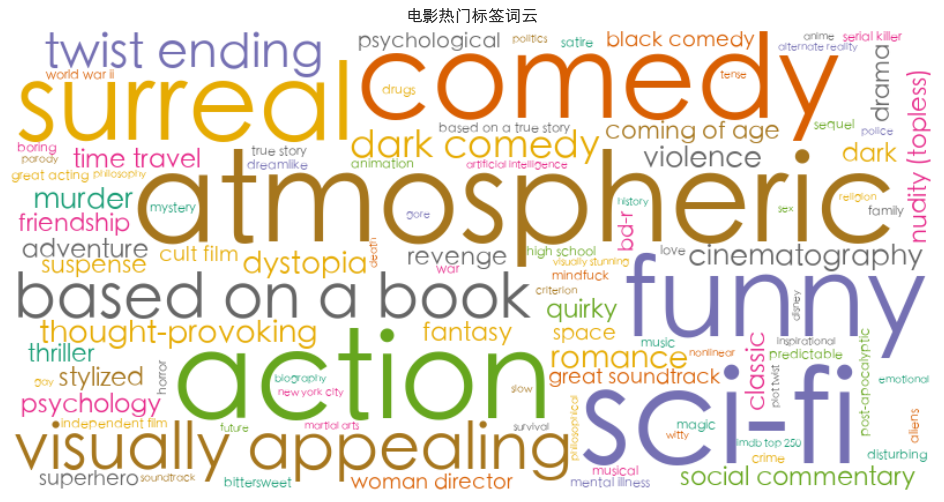

In [14]:
print(f"共有标签记录: {len(tags)}")
tags["tag_clean"] = tags["tag"].astype(str).str.lower()
tag_freq = tags["tag_clean"].value_counts().head(100)
font_path = "/System/Library/Fonts/STHeiti Light.ttc"

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color="white", 
    colormap="Dark2", 
    font_path=font_path # 使用新路径
).generate_from_frequencies(tag_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("电影热门标签词云")
plt.show()


/var/folders/_5/ql8mk2rn2sg4gcml8stj86tw0000gn/T/ipykernel_54045/2428354465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_freq.head(20).values, y=tag_freq.head(20).index, palette="magma")


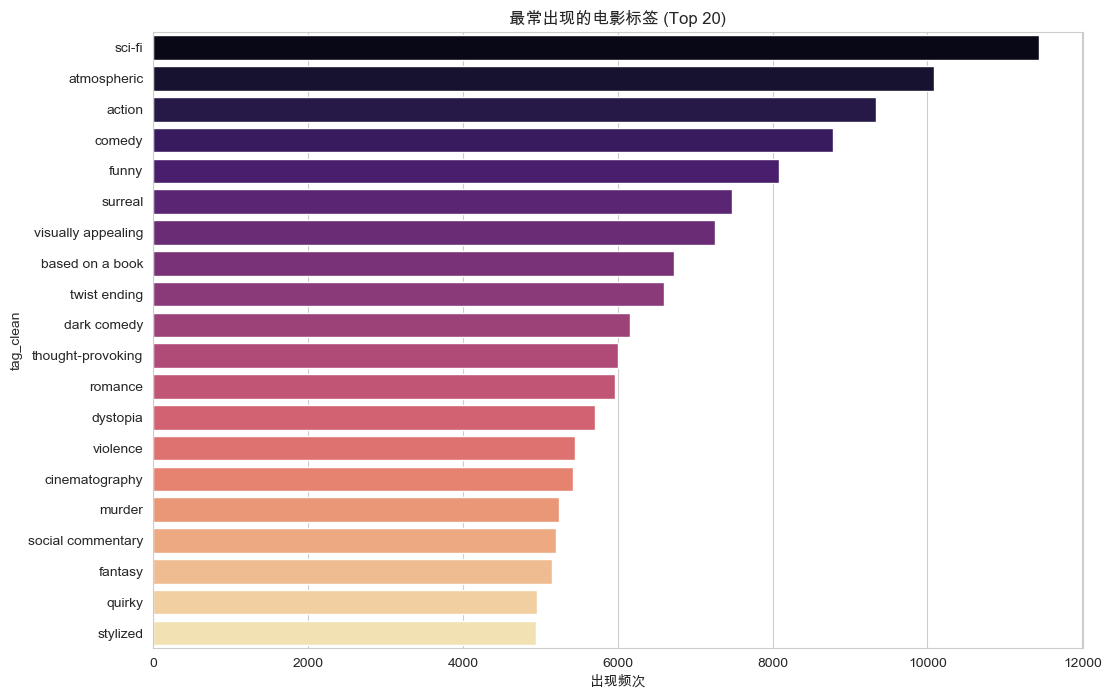

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(x=tag_freq.head(20).values, y=tag_freq.head(20).index, palette="magma")
plt.title("最常出现的电影标签 (Top 20)")
plt.xlabel("出现频次")
plt.show()


## 3. 关联分析与质量评估


<Figure size 1000x600 with 0 Axes>

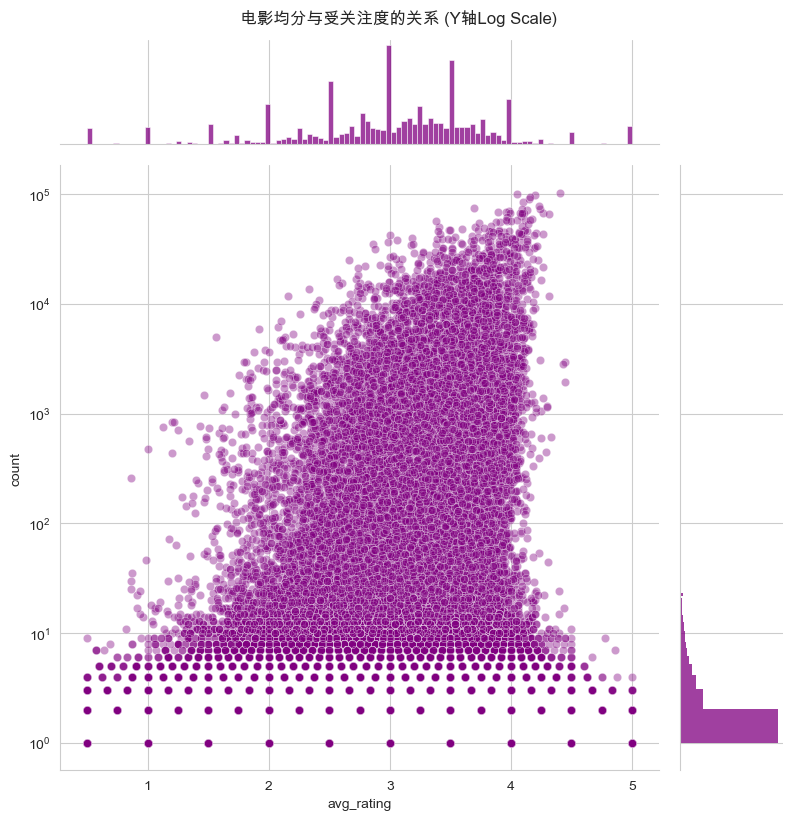

In [9]:
movie_stats = ratings.groupby("movieId").agg(avg_rating=("rating", "mean"), count=("rating", "count")).merge(movies[["movieId", "title"]], on="movieId")
plt.figure(figsize=(10, 6))
g = sns.jointplot(x="avg_rating", y="count", data=movie_stats, alpha=0.4, height=8, color="purple")
g.ax_joint.set_yscale("log")
plt.suptitle("电影均分与受关注度的关系 (Y轴Log Scale)", y=1.02)
plt.show()


## 4. 结论与下一步召回思路

1. **冷启动问题**：电影评分数长尾分布极其严重，召回阶段需考虑覆盖低频电影。
2. **热门偏置**：头部电影占据绝大部分评分，协同过滤可能会有显著的热门偏置。
3. **语义特征**：Tags 数据非常丰富，是构建 Content-based 召回的核心特征。
